In [1]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
import numpy as np
import matplotlib.pyplot as plt
import random
from glob import glob
import os
from PIL import Image

# Pre-requisite Setups 

## Download and Generate Datasets

First of all, you need to generate the biased MNIST-CIFAR10 dataset, as described in README.md.
Running the command line below will start generating both train and test dataset for given correlation (rho).

In [2]:
if not os.path.exists("./dataset"):
    !python dataset.py --rho 1.0, 0.999, 0.997, 0.995, 0.990, 0.90, 0.1
else:
    print("Datasets already exist!")

Datasets already exist!


## Dataset Path and Correlation
From the datasets generated above, we can define train dataset, biased test dataset and unbiased tes dataset with certain correlation, as mentioned in the original paper. More specifically, we can define train and biased test dataset with target correlation (rho), and unbiased test dataset with rho = 0.1.

In [3]:
#Define the correlation for both train and biased test datasets.
rho = 0.999

In [4]:
#Define the train and test dataset path
train_dir = "./dataset/mnist_cifar/{}/train".format(rho)
train_path = glob(os.path.join(train_dir, "*"))
biased_test_dir = "./dataset/mnist_cifar/{}/test".format(rho)
biased_test_path = glob(os.path.join(biased_test_dir, "*"))
unbiased_test_dir = "./dataset/mnist_cifar/0.1/test"
unbiased_test_path = glob(os.path.join(unbiased_test_dir, "*"))

## Arrangement of data samples by MNIST labels
To visualize the characteristic of bias in each dataset, we first arrange the data samples according to the MNIST labels.

In [5]:
#Generated Images listed according to the MNIST label
#Train Dataset
mnist_train_path = [[] for i in range(10)]
for path in train_path:
    mnist_name = path.split('/')[-1].split('.')[0].split('_')[-2]
    mnist_train_path[int(mnist_name)].append(path)

#Biased Test Dataset
mnist_biased_test_path = [[] for i in range(10)]
for path in biased_test_path:
    mnist_name = path.split('/')[-1].split('.')[0].split('_')[-2]
    mnist_biased_test_path[int(mnist_name)].append(path)

#Unbiased Test Dataset
mnist_unbiased_test_path = [[] for i in range(10)]
for path in unbiased_test_path:
    mnist_name = path.split('/')[-1].split('.')[0].split('_')[-2]
    mnist_unbiased_test_path[int(mnist_name)].append(path)

## Example image

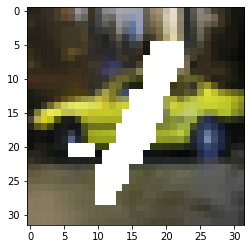

In [6]:
example_mnist_label = 1
image_index = np.random.randint(1, len(mnist_train_path[example_mnist_label]))
plt.imshow(Image.open(mnist_train_path[example_mnist_label][image_index]))

## Arrangement of data samples by CIFAR-10 labels

### Visualize MNIST-CIFAR10

After arranging the samples by their MNIST labels, we again arrange them according to their CIFAR-10 labels. Due to the correlation between these two labels, especially in the train and biased test set, images with specific CIFAR-10 class are shown in a specific MNIST label. In contrast, unbiased test set demonstrate the equally distributed classes of CIFAR-10 images for each class of MNIST.
Pre-defined label mapping used in the generation of biased dataset is below:

#### ```label_dict = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}```
Given MNIST label, cells below present the MNIST-CIFAR10 images for the MNIST label with 10 differnt CIFAR-10 classes.
Each row represents a list of images from one class each, and there are 10 rows for total 10 CIFAR-10 classes. Some row are shown blank due to the correlation between MNIST label and CIFAR-10 labels. Specifically, with rho=0.999, 99.9% of the images from the 0-th CIFAR-10 class are shown as background with MNIST 0 class.

### Training Dataset

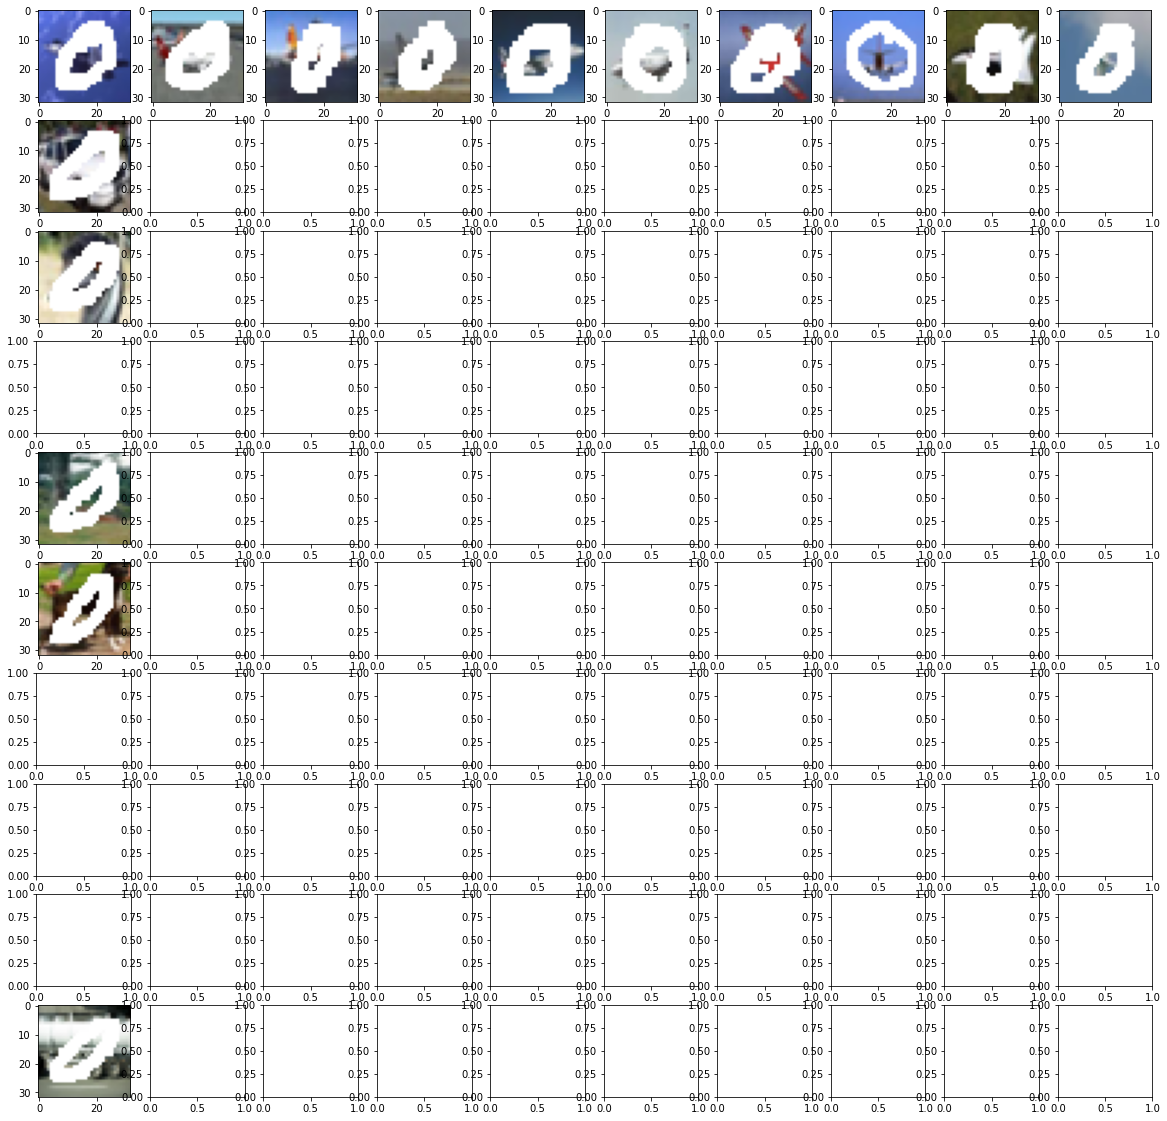

In [7]:
#Dfine a MNIST index
mnist_index = 0

cifar_train_path = [[] for i in range(10)]
for path in mnist_train_path[mnist_index]:
    cifar_name = path.split('/')[-1].split('.')[0].split('_')[-1]
    cifar_train_path[int(cifar_name)].append(path)

fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(10):
    for j in range(10):
        if j >= len(cifar_train_path[i]):
            pass
        else:
            ax[i, j].imshow(Image.open(cifar_train_path[i][j]))

### Biased Test Dataset

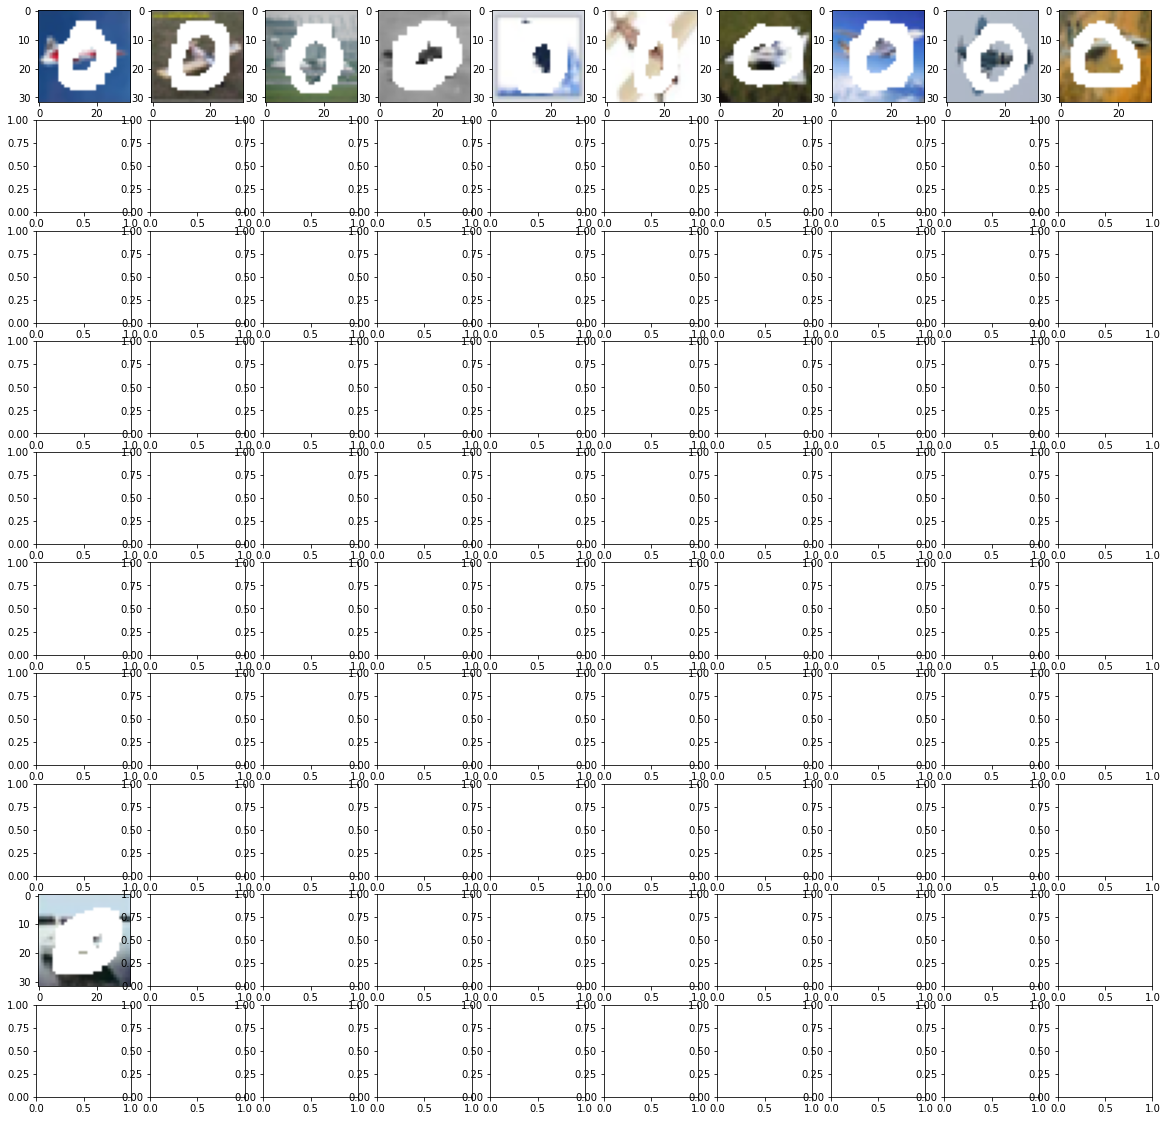

In [8]:
cifar_biased_test_path = [[] for i in range(10)]
for path in mnist_biased_test_path[mnist_index]:
    cifar_name = path.split('/')[-1].split('.')[0].split('_')[-1]
    cifar_biased_test_path[int(cifar_name)].append(path)

fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(10):
    for j in range(10):
        if j >= len(cifar_biased_test_path[i]):
            pass
        else:
            ax[i, j].imshow(Image.open(cifar_biased_test_path[i][j]))

### Unbiased Test Dataset

In [ ]:
cifar_unbiased_test_path = [[] for i in range(10)]
for path in mnist_unbiased_test_path[mnist_index]:
    cifar_name = path.split('/')[-1].split('.')[0].split('_')[-1]
    cifar_unbiased_test_path[int(cifar_name)].append(path)

fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(10):
    for j in range(10):
        if j >= len(cifar_unbiased_test_path[i]):
            pass
        else:
            ax[i, j].imshow(Image.open(cifar_unbiased_test_path[i][j]))